In [1]:
import warnings  
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from env import get_db_url
import acquire
import wrangle
pd.set_option("display.max_rows", 2500)

In [2]:
df, df_staff, df_multicohort, df_unimputed, df_non_curriculum, df_outliers = wrangle.full_wrangle()

In [3]:
wd_df = df[df.program_type=='Web Development']
ds_df = df[df.program_type=='Data Science']

#### Web Development Students viewing access to Data Science Curriculum

In [4]:
# determine what a data science course is 
wd_to_ds_access_df = wd_df[wd_df.path.str.contains('science')]
wd_to_ds_access_df.head()

,user_id,path,ip,name,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,
2019-04-13 01:39:14,220,datascience,70.120.5.227,Wrangell,datascience,,,,2018-07-23,2018-11-29,2,1,Web Development
2019-04-13 01:40:39,220,data-science,70.120.5.227,Wrangell,data-science,,,,2018-07-23,2018-11-29,2,1,Web Development
2019-08-26 08:53:28,41,1-fundamentals/1.1-intro-to-data-science,97.105.19.58,Sequoia,1-fundamentals,,1.1-intro-to-data-science,,2017-09-27,2018-02-15,2,8,Web Development
2019-08-26 08:54:43,41,1-fundamentals/1.2-data-science-pipeline,97.105.19.58,Sequoia,1-fundamentals,,1.2-data-science-pipeline,,2017-09-27,2018-02-15,2,8,Web Development
2019-08-27 08:50:09,41,1-fundamentals/1.1-intro-to-data-science,97.105.19.58,Sequoia,1-fundamentals,,1.1-intro-to-data-science,,2017-09-27,2018-02-15,2,8,Web Development


In [5]:
# view daily cross-acess in web development to data science
daily_wd_to_ds_access_df = wd_to_ds_access_df.resample('D').count()
daily_wd_to_ds_access_df

,user_id,path,ip,name,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,
2019-04-13,2,2,2,2,2,2,2,2,2,2,2,2,2
2019-04-14,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-04-15,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-04-16,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-04-17,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-04-18,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-04-19,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-04-20,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-04-21,0,0,0,0,0,0,0,0,0,0,0,0,0


**Data Science curriculum was reviewed by a web development student in April, prior to the program beginning. Cross-curriculum viewing ends in 2019, as mentioned, but begins again in November 2020 until the end of the dataset. Who are theses users?**
- User 220 accessed Data Science Program in April 2019.
- Users 20, 495, and 790 accessed Data Science Program after 2019 cutoff.

In [6]:
wd_to_ds_access_df['2020-10-31':]

,user_id,path,ip,name,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,
2020-11-10 10:14:09,20,fundamentals/intro-to-data-science,104.190.242.242,Teddy,fundamentals,,intro-to-data-science,,2018-01-08,2018-05-17,2,10,Web Development
2020-11-17 08:40:22,495,fundamentals/intro-to-data-science,72.191.58.18,Deimos,fundamentals,,intro-to-data-science,,2019-09-16,2020-02-27,2,8,Web Development
2020-12-11 16:06:49,20,fundamentals/intro-to-data-science,104.190.242.242,Teddy,fundamentals,,intro-to-data-science,,2018-01-08,2018-05-17,2,16,Web Development
2020-12-11 16:06:59,20,fundamentals/intro-to-data-science,104.190.242.242,Teddy,fundamentals,,intro-to-data-science,,2018-01-08,2018-05-17,2,16,Web Development
2021-01-11 09:42:53,20,fundamentals/intro-to-data-science,104.190.242.242,Teddy,fundamentals,,intro-to-data-science,,2018-01-08,2018-05-17,2,9,Web Development
2021-02-23 22:01:51,20,fundamentals/intro-to-data-science,104.190.242.242,Teddy,fundamentals,,intro-to-data-science,,2018-01-08,2018-05-17,2,22,Web Development
2021-02-25 09:02:46,20,fundamentals/intro-to-data-science,104.190.242.242,Teddy,fundamentals,,intro-to-data-science,,2018-01-08,2018-05-17,2,9,Web Development
2021-03-12 10:13:21,790,datascience,99.173.134.103,Kalypso,datascience,,,,2020-11-02,2021-05-04,2,10,Web Development


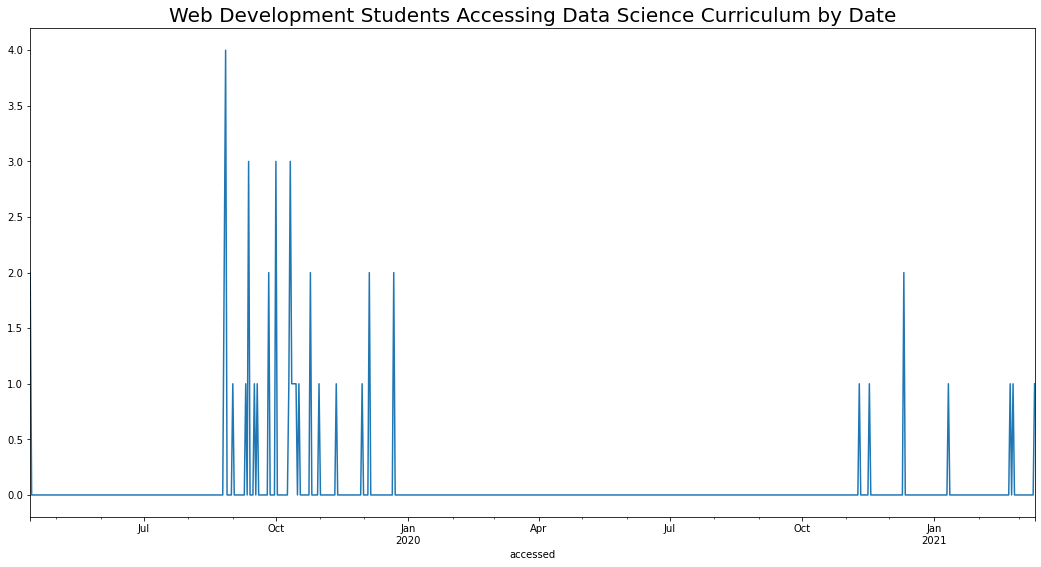

In [7]:
plt.figure(figsize = (18, 9))
daily_wd_to_ds_access_df.program_id.plot()
plt.title('Web Development Students Accessing Data Science Curriculum by Date', fontsize=20)
plt.show()

In [8]:
wd_to_ds_access_df.groupby(wd_to_ds_access_df.user_id).count()

,path,ip,name,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
user_id,,,,,,,,,,,,
18,5,5,5,5,5,5,5,5,5,5,5,5
20,6,6,6,6,6,6,6,6,6,6,6,6
41,6,6,6,6,6,6,6,6,6,6,6,6
53,1,1,1,1,1,1,1,1,1,1,1,1
94,2,2,2,2,2,2,2,2,2,2,2,2
138,1,1,1,1,1,1,1,1,1,1,1,1
171,1,1,1,1,1,1,1,1,1,1,1,1
220,2,2,2,2,2,2,2,2,2,2,2,2
249,3,3,3,3,3,3,3,3,3,3,3,3


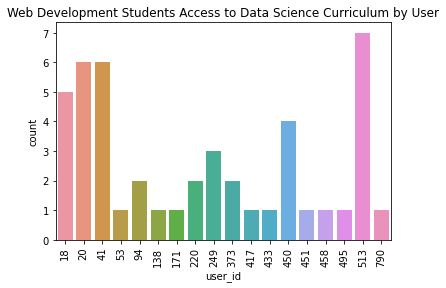

In [9]:
# view web development students that access data science by user id
sns.countplot(data=wd_to_ds_access_df, x=wd_to_ds_access_df.user_id)
plt.title('Web Development Students Access to Data Science Curriculum by User')
plt.xticks(rotation=90)
plt.show()

In [10]:
# user 513 only active in October 2019 in both ds and wd curriculum
df[df.user_id==513]

,user_id,path,ip,name,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,
2019-10-11 12:11:24,513,login,74.81.88.162,Glacier,login,,,,2015-06-05,2015-10-06,1,12,Web Development
2019-10-11 12:19:14,513,html-css/forms,74.81.88.162,Glacier,html-css,,forms,,2015-06-05,2015-10-06,1,12,Web Development
2019-10-11 12:19:38,513,javascript-i/coffee-project,74.81.88.162,Glacier,javascript-i,,coffee-project,,2015-06-05,2015-10-06,1,12,Web Development
2019-10-11 17:32:00,513,java-i,66.25.130.242,Glacier,java-i,,,,2015-06-05,2015-10-06,1,17,Web Development
2019-10-11 17:32:17,513,1-fundamentals/1.1-intro-to-data-science,66.25.130.242,Glacier,1-fundamentals,,1.1-intro-to-data-science,,2015-06-05,2015-10-06,1,17,Web Development
2019-10-12 02:22:42,513,java-i,173.239.232.166,Glacier,java-i,,,,2015-06-05,2015-10-06,1,2,Web Development
2019-10-12 02:22:42,513,1-fundamentals/1.1-intro-to-data-science,173.239.232.166,Glacier,1-fundamentals,,1.1-intro-to-data-science,,2015-06-05,2015-10-06,1,2,Web Development
2019-10-13 22:15:41,513,1-fundamentals/1.1-intro-to-data-science,66.25.130.242,Glacier,1-fundamentals,,1.1-intro-to-data-science,,2015-06-05,2015-10-06,1,22,Web Development
2019-10-14 02:01:56,513,java-i,173.239.232.12,Glacier,java-i,,,,2015-06-05,2015-10-06,1,2,Web Development


In [11]:
# Teddy had the most cross curriculum access but graduated in May of 2018, before the data science program began
wd_to_ds_access_df.groupby(wd_to_ds_access_df.name).count()

,user_id,path,ip,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
name,,,,,,,,,,,,
Andromeda,2,2,2,2,2,2,2,2,2,2,2,2
Betelgeuse,1,1,1,1,1,1,1,1,1,1,1,1
Ceres,7,7,7,7,7,7,7,7,7,7,7,7
Deimos,1,1,1,1,1,1,1,1,1,1,1,1
Glacier,7,7,7,7,7,7,7,7,7,7,7,7
Kalypso,1,1,1,1,1,1,1,1,1,1,1,1
Lassen,1,1,1,1,1,1,1,1,1,1,1,1
Quincy,2,2,2,2,2,2,2,2,2,2,2,2
Sequoia,6,6,6,6,6,6,6,6,6,6,6,6


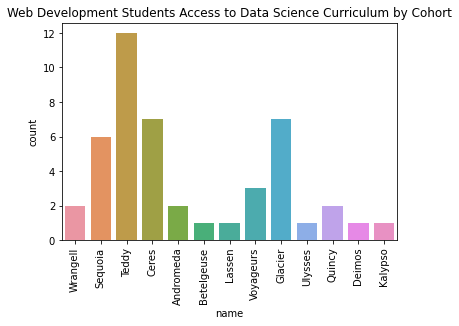

In [12]:
sns.countplot(data=wd_to_ds_access_df, x=wd_to_ds_access_df.name)
plt.title('Web Development Students Access to Data Science Curriculum by Cohort')
plt.xticks(rotation=90)
plt.show()

#### Data Science Students accessing Web Development Curriculum

In [13]:
# determine what a web development course is (possibly update when path is parsed?)
ds_to_wd_access_df=ds_df[ds_df.path.str.contains('java')]
ds_to_wd_access_df.head()

,user_id,path,ip,name,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,
2019-09-23 11:45:09,476,java-iii,97.105.19.58,Bayes,java-iii,,,,2019-08-19,2020-01-30,3,11,Data Science
2019-09-25 19:30:44,476,javascript-i,136.50.49.145,Bayes,javascript-i,,,,2019-08-19,2020-01-30,3,19,Data Science
2019-09-25 19:31:07,476,javascript-i,136.50.49.145,Bayes,javascript-i,,,,2019-08-19,2020-01-30,3,19,Data Science
2019-09-25 19:31:11,476,java-i,136.50.49.145,Bayes,java-i,,,,2019-08-19,2020-01-30,3,19,Data Science
2019-09-25 19:31:12,476,javascript-i,136.50.49.145,Bayes,javascript-i,,,,2019-08-19,2020-01-30,3,19,Data Science


In [14]:
daily_ds_to_wd_access_df=ds_to_wd_access_df.resample('D').count()
daily_ds_to_wd_access_df

,user_id,path,ip,name,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,
2019-09-23,1,1,1,1,1,1,1,1,1,1,1,1,1
2019-09-24,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-09-25,10,10,10,10,10,10,10,10,10,10,10,10,10
2019-09-26,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-09-27,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-09-28,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-09-29,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-09-30,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-10-01,0,0,0,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Data Science Students Accessing Web Development Curriculum by Date')

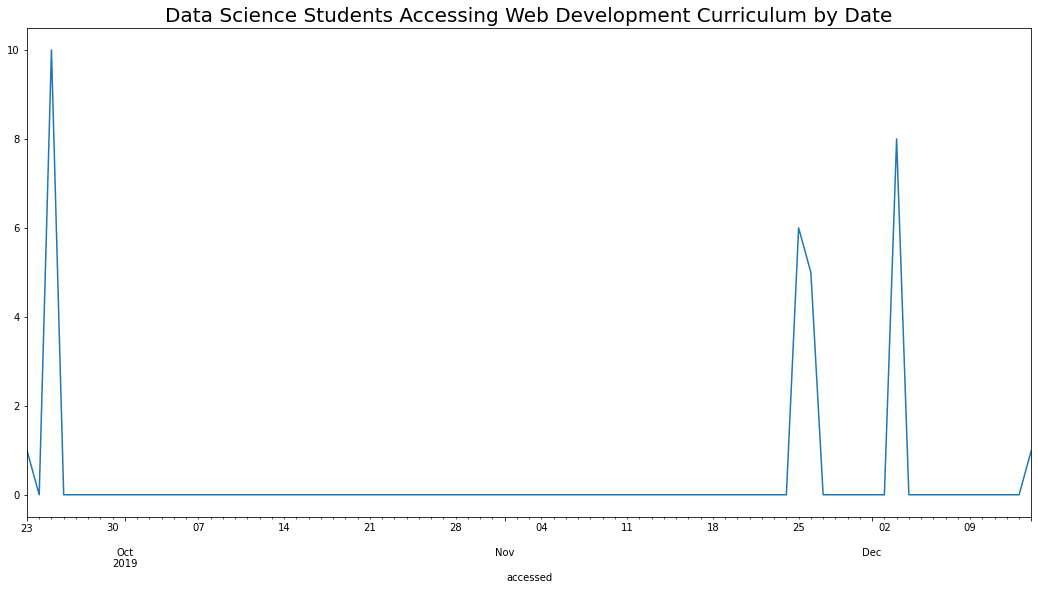

In [15]:
plt.figure(figsize = (18, 9))
daily_ds_to_wd_access_df.program_id.plot()
plt.title('Data Science Students Accessing Web Development Curriculum by Date', fontsize=20)

**The cleaned dataframe shows and end to data science students viewing web development curriculum in 2019, which is different than the other analysis.**

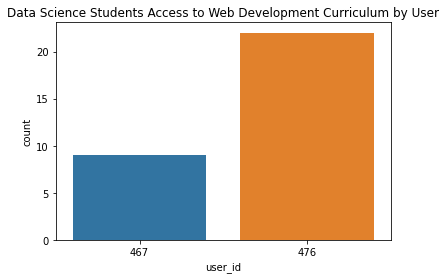

In [16]:
sns.countplot(data=ds_to_wd_access_df, x=ds_to_wd_access_df.user_id)
plt.title('Data Science Students Access to Web Development Curriculum by User')
plt.show()

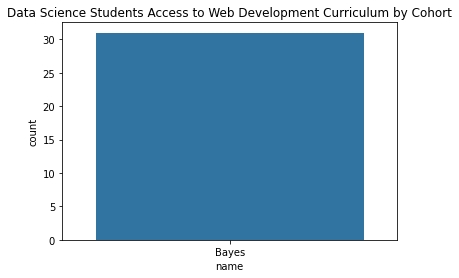

In [17]:
sns.countplot(data=ds_to_wd_access_df, x=ds_to_wd_access_df.name)
plt.title('Data Science Students Access to Web Development Curriculum by Cohort')
plt.show()

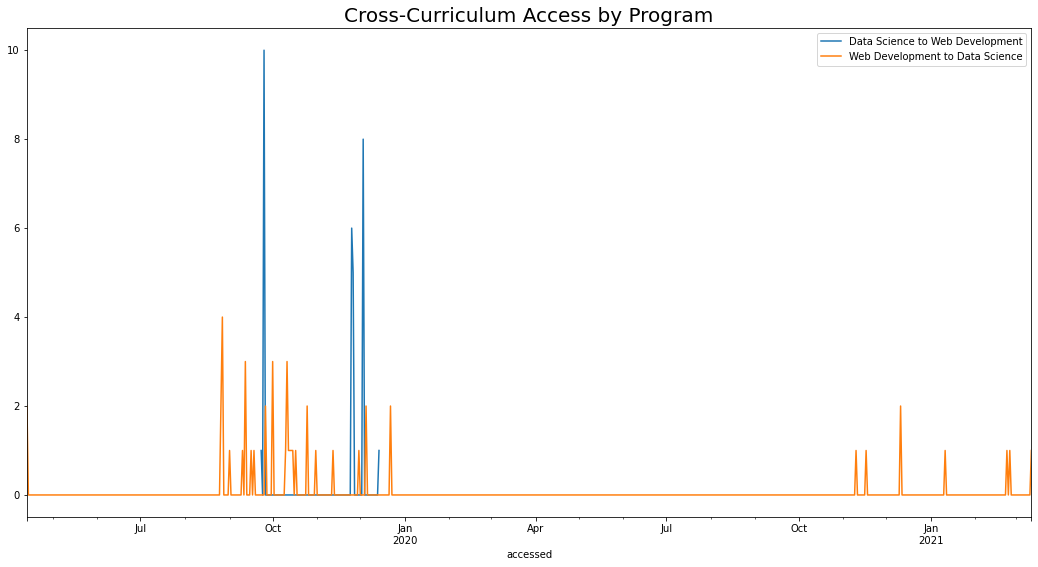

In [40]:
plt.figure(figsize = (18, 9))
daily_ds_to_wd_access_df.program_id.plot(label='Data Science to Web Development')
daily_wd_to_ds_access_df.program_id.plot(label='Web Development to Data Science')
plt.title('Cross-Curriculum Access by Program', fontsize=20)
plt.legend()
plt.show()

### Utlizing Outlier Dataframe

In [18]:
df_outliers = wrangle.change_datatypes(df_outliers)
df_outliers = wrangle.add_columns(df_outliers)

In [19]:
df_outliers.head()

,user_id,path,ip,name,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,
2018-01-26 09:56:46,3,javascript-i/conditionals,97.105.19.61,Teddy,javascript-i,None,conditionals,None,2018-01-08,2018-05-17,2,9,Web Development
2018-01-26 09:56:48,3,javascript-i/functions,97.105.19.61,Teddy,javascript-i,None,functions,None,2018-01-08,2018-05-17,2,9,Web Development
2018-01-26 10:08:34,10,git/merge-conflict-demo,97.105.19.61,Sequoia,git,None,merge-conflict-demo,None,2017-09-27,2018-02-15,2,10,Web Development
2018-01-26 10:08:55,10,git/working-in-teams,97.105.19.61,Sequoia,git,None,working-in-teams,None,2017-09-27,2018-02-15,2,10,Web Development
2018-01-26 10:10:16,3,javascript-i/functions,97.105.19.61,Teddy,javascript-i,None,functions,None,2018-01-08,2018-05-17,2,10,Web Development


In [20]:
wd = df_outliers[df_outliers.program_type=='Web Development']
ds = df_outliers[df_outliers.program_type=='Data Science']

In [21]:
# determine what a data science course is 
wd_to_ds_access=wd[wd.path.str.contains('science')]
wd_to_ds_access.head()

,user_id,path,ip,name,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,
2019-08-23 11:45:04,410,1-fundamentals/1.1-intro-to-data-science,97.105.19.58,Betelgeuse,1-fundamentals,None,1.1-intro-to-data-science,None,2019-05-28,2019-10-08,2,11,Web Development
2019-08-23 11:46:16,423,1-fundamentals/1.1-intro-to-data-science,97.105.19.58,Betelgeuse,1-fundamentals,None,1.1-intro-to-data-science,None,2019-05-28,2019-10-08,2,11,Web Development
2019-08-23 11:46:29,410,1-fundamentals/1.1-intro-to-data-science,97.105.19.58,Betelgeuse,1-fundamentals,None,1.1-intro-to-data-science,None,2019-05-28,2019-10-08,2,11,Web Development
2019-08-23 11:46:31,410,1-fundamentals/1.1-intro-to-data-science,97.105.19.58,Betelgeuse,1-fundamentals,None,1.1-intro-to-data-science,None,2019-05-28,2019-10-08,2,11,Web Development
2019-09-20 14:43:30,201,1-fundamentals/1.1-intro-to-data-science,170.248.173.247,Voyageurs,1-fundamentals,None,1.1-intro-to-data-science,None,2018-05-29,2018-10-11,2,14,Web Development


In [22]:
# view daily cross-acess in web development to data science
daily_wd_to_ds_access=wd_to_ds_access.resample('D').count()
daily_wd_to_ds_access

,user_id,path,ip,name,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,
2019-08-23,4,4,4,4,4,0,4,0,4,4,4,4,4
2019-08-24,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-08-25,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-08-26,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-08-27,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-08-28,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-08-29,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-08-30,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-08-31,0,0,0,0,0,0,0,0,0,0,0,0,0


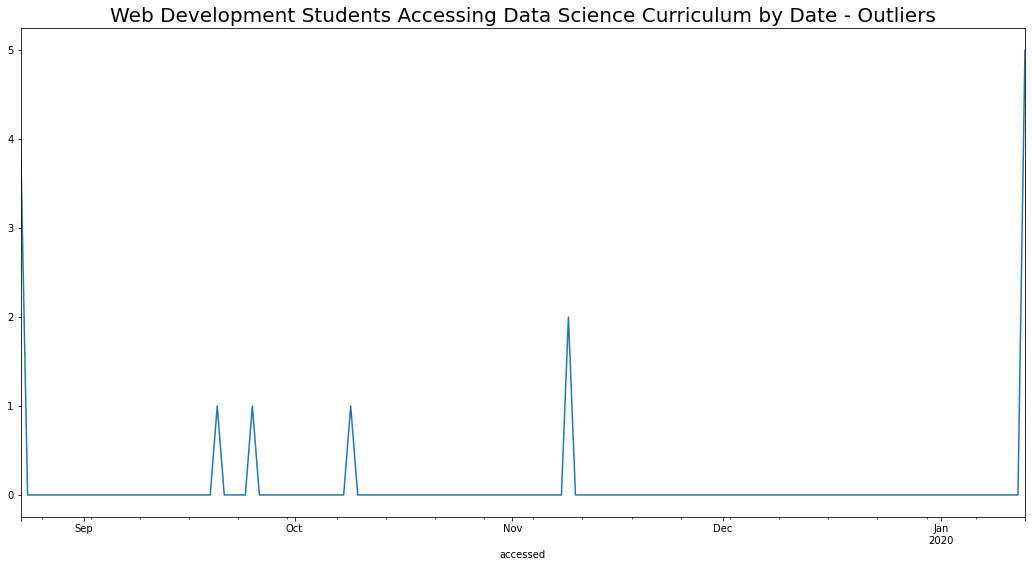

In [23]:
plt.figure(figsize = (18, 9))
daily_wd_to_ds_access.program_id.plot()
plt.title('Web Development Students Accessing Data Science Curriculum by Date - Outliers', fontsize=20)
plt.show()

In [24]:
wd_to_ds_access.groupby(wd_to_ds_access.name).count()

,user_id,path,ip,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
name,,,,,,,,,,,,
Betelgeuse,9,9,9,9,0,9,0,9,9,9,9,9
Ulysses,2,2,2,2,0,2,0,2,2,2,2,2
Voyageurs,3,3,3,3,0,3,0,3,3,3,3,3


In [25]:
wd_to_ds_access.groupby(wd_to_ds_access.user_id).count()

,path,ip,name,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
user_id,,,,,,,,,,,,
124,2,2,2,2,0,2,0,2,2,2,2,2
201,3,3,3,3,0,3,0,3,3,3,3,3
410,8,8,8,8,0,8,0,8,8,8,8,8
423,1,1,1,1,0,1,0,1,1,1,1,1


In [29]:
# determine what a web development course is 
ds_to_wd_access=ds[ds.path.str.contains('java')]
ds_to_wd_access.head()

,user_id,path,ip,name,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,
2019-11-26 15:32:05,472,javascript-i/conditionals,97.105.19.58,Bayes,javascript-i,None,conditionals,None,2019-08-19,2020-01-30,3,15,Data Science
2020-05-19 16:03:32,590,java-ii/object-oriented-programming,130.45.47.56,Curie,java-ii,None,object-oriented-programming,None,2020-02-03,2020-07-07,3,16,Data Science
2020-10-23 23:04:14,782,java-ii,67.11.117.74,Darden,java-ii,None,None,None,2020-07-13,2021-01-12,3,23,Data Science
2020-10-23 23:04:16,782,java-ii/collections,67.11.117.74,Darden,java-ii,None,collections,None,2020-07-13,2021-01-12,3,23,Data Science
2020-10-26 16:53:09,782,java-i,67.11.117.74,Darden,java-i,None,None,None,2020-07-13,2021-01-12,3,16,Data Science


In [30]:
# view daily cross-access from DS to WD
daily_ds_to_wd_access=ds_to_wd_access.resample('D').count()
daily_ds_to_wd_access

,user_id,path,ip,name,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,
2019-11-26,1,1,1,1,1,0,1,0,1,1,1,1,1
2019-11-27,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-11-28,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-11-29,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-11-30,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-12-01,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-12-02,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-12-03,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-12-04,0,0,0,0,0,0,0,0,0,0,0,0,0


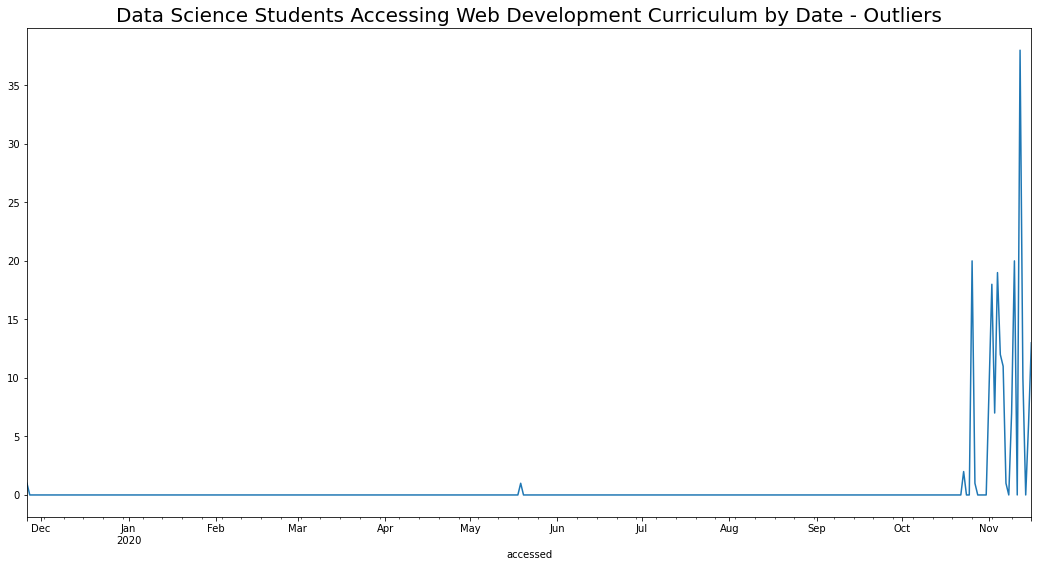

In [31]:
plt.figure(figsize = (18, 9))
daily_ds_to_wd_access.program_id.plot()
plt.title('Data Science Students Accessing Web Development Curriculum by Date - Outliers', fontsize=20)
plt.show()

In [32]:
ds_to_wd_access.groupby(ds_to_wd_access.name).count()

,user_id,path,ip,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
name,,,,,,,,,,,,
Bayes,1,1,1,1,0,1,0,1,1,1,1,1
Curie,1,1,1,1,0,1,0,1,1,1,1,1
Darden,194,194,194,194,0,147,0,194,194,194,194,194


In [33]:
ds_to_wd_access.groupby(ds_to_wd_access.user_id).count()

,path,ip,name,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
user_id,,,,,,,,,,,,
472,1,1,1,1,0,1,0,1,1,1,1,1
590,1,1,1,1,0,1,0,1,1,1,1,1
782,194,194,194,194,0,147,0,194,194,194,194,194


In [35]:
df_outliers[df_outliers.user_id==782]

,user_id,path,ip,name,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,
2020-10-23 23:04:14,782,java-ii,67.11.117.74,Darden,java-ii,None,None,None,2020-07-13,2021-01-12,3,23,Data Science
2020-10-23 23:04:16,782,java-ii/collections,67.11.117.74,Darden,java-ii,None,collections,None,2020-07-13,2021-01-12,3,23,Data Science
2020-10-26 01:00:55,782,mysql,67.11.117.74,Darden,mysql,None,None,None,2020-07-13,2021-01-12,3,1,Data Science
2020-10-26 01:00:58,782,mysql/users,67.11.117.74,Darden,mysql,None,users,None,2020-07-13,2021-01-12,3,1,Data Science
2020-10-26 01:01:38,782,mysql/introduction,67.11.117.74,Darden,mysql,None,introduction,None,2020-07-13,2021-01-12,3,1,Data Science
2020-10-26 01:01:45,782,mysql/users,67.11.117.74,Darden,mysql,None,users,None,2020-07-13,2021-01-12,3,1,Data Science
2020-10-26 04:24:05,782,mysql,67.11.117.74,Darden,mysql,None,None,None,2020-07-13,2021-01-12,3,4,Data Science
2020-10-26 04:24:13,782,mysql/introduction,67.11.117.74,Darden,mysql,None,introduction,None,2020-07-13,2021-01-12,3,4,Data Science
2020-10-26 04:24:14,782,mysql/users,67.11.117.74,Darden,mysql,None,users,None,2020-07-13,2021-01-12,3,4,Data Science


In [36]:
df_outliers[df_outliers.user_id==590]

,user_id,path,ip,name,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,
2020-02-04 10:05:39,590,1-fundamentals/1.1-intro-to-data-science,97.105.19.58,Curie,1-fundamentals,None,1.1-intro-to-data-science,None,2020-02-03,2020-07-07,3,10,Data Science
2020-02-05 09:28:06,590,1-fundamentals/1.2-data-science-pipeline,97.105.19.58,Curie,1-fundamentals,None,1.2-data-science-pipeline,None,2020-02-03,2020-07-07,3,9,Data Science
2020-02-05 13:15:32,590,1-fundamentals/1.1-intro-to-data-science,97.105.19.58,Curie,1-fundamentals,None,1.1-intro-to-data-science,None,2020-02-03,2020-07-07,3,13,Data Science
2020-02-06 08:47:08,590,1-fundamentals/1.1-intro-to-data-science,97.105.19.58,Curie,1-fundamentals,None,1.1-intro-to-data-science,None,2020-02-03,2020-07-07,3,8,Data Science
2020-02-06 08:47:16,590,1-fundamentals/3-vocabulary,97.105.19.58,Curie,1-fundamentals,None,3-vocabulary,None,2020-02-03,2020-07-07,3,8,Data Science
2020-02-06 09:16:03,590,1-fundamentals/1.2-data-science-pipeline,97.105.19.58,Curie,1-fundamentals,None,1.2-data-science-pipeline,None,2020-02-03,2020-07-07,3,9,Data Science
2020-02-06 09:26:43,590,1-fundamentals/1.3-pipeline-demo,97.105.19.58,Curie,1-fundamentals,None,1.3-pipeline-demo,None,2020-02-03,2020-07-07,3,9,Data Science
2020-02-06 09:26:56,590,1-fundamentals/1.2-data-science-pipeline,97.105.19.58,Curie,1-fundamentals,None,1.2-data-science-pipeline,None,2020-02-03,2020-07-07,3,9,Data Science
2020-02-07 10:05:40,590,1-fundamentals/1.1-intro-to-data-science,97.105.19.58,Curie,1-fundamentals,None,1.1-intro-to-data-science,None,2020-02-03,2020-07-07,3,10,Data Science


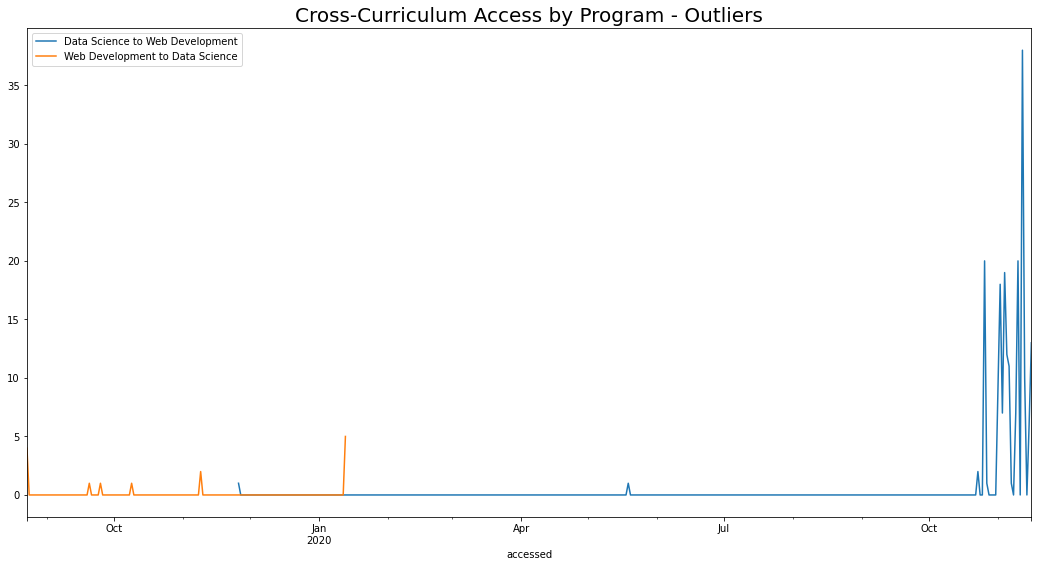

In [41]:
plt.figure(figsize = (18, 9))
daily_ds_to_wd_access.program_id.plot(label='Data Science to Web Development')
daily_wd_to_ds_access.program_id.plot(label='Web Development to Data Science')
plt.title('Cross-Curriculum Access by Program - Outliers', fontsize=20)
plt.legend()
plt.show()